# 2. El equipo que tiene más jugadores con tarjeta amarilla, pierde

In [1]:
#Importamos librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Importamos el csv
df = pd.read_csv("data/Matches.csv") 

df

C:\Users\david\AppData\Local\Temp\ipykernel_15116\127379129.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/Matches.csv")


,Division,MatchDate,MatchTime,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,...,MaxUnder25,HandiSize,HandiHome,HandiAway,C_LTH,C_LTA,C_VHD,C_VAD,C_HTB,C_PHB
0,F1,2000-07-28,NaN,Marseille,Troyes,1686.34,1586.57,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,F1,2000-07-28,NaN,Paris SG,Strasbourg,1714.89,1642.51,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,F2,2000-07-28,NaN,Wasquehal,Nancy,1465.08,1633.80,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,F1,2000-07-29,NaN,Auxerre,Sedan,1635.58,1624.22,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,F1,2000-07-29,NaN,Bordeaux,Metz,1734.34,1673.11,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,17:30:00,Cartagena,Mirandes,1339.21,1544.15,3.0,6.0,7.0,...,2.40,1.8,1.95,1.85,0.0209,0.0118,0.0099,0.8084,0.1386,0.0104
230553,SP2,2025-06-01,17:30:00,Almeria,Tenerife,1544.16,1433.67,4.0,10.0,1.0,...,2.55,-1.8,1.80,2.00,0.3799,0.0630,0.2806,0.0160,0.2332,0.0274
230554,SP2,2025-06-01,17:30:00,La Coruna,Elche,1473.67,1569.98,0.0,3.0,3.0,...,2.63,1.3,1.78,2.03,0.0224,0.7482,0.0100,0.1201,0.0180,0.0813
230555,SP2,2025-06-01,17:30:00,Oviedo,Cadiz,1574.90,1525.76,7.0,13.0,6.0,...,1.51,-0.8,1.95,1.85,0.2070,0.2490,0.2334,0.0211,0.2634,0.0261


In [7]:
#observamos las columnas que tiene el df
df.columns

Index(['Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHome', 'FTAway',
       'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots', 'AwayShots',
       'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners',
       'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed',
       'OddHome', 'OddDraw', 'OddAway'],
      dtype='object')

In [6]:
#Eliminamos las últimas columnas que no aportan nada 
df = df.iloc[:,:-16]

In [5]:
#Eliminamos más columnas innecesarias
df = df.drop(columns=["MatchTime", "AwayElo","HomeElo","Form3Home","Form5Home","Form3Away","Form5Away"])

In [8]:
#Comprobamos que se han quedado las columnas que necesitamos
df.columns

Index(['Division', 'MatchDate', 'HomeTeam', 'AwayTeam', 'FTHome', 'FTAway',
       'FTResult', 'HTHome', 'HTAway', 'HTResult', 'HomeShots', 'AwayShots',
       'HomeTarget', 'AwayTarget', 'HomeFouls', 'AwayFouls', 'HomeCorners',
       'AwayCorners', 'HomeYellow', 'AwayYellow', 'HomeRed', 'AwayRed',
       'OddHome', 'OddDraw', 'OddAway'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230557 entries, 0 to 230556
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     230557 non-null  object 
 1   MatchDate    230557 non-null  object 
 2   HomeTeam     230557 non-null  object 
 3   AwayTeam     230557 non-null  object 
 4   FTHome       230554 non-null  float64
 5   FTAway       230554 non-null  float64
 6   FTResult     230554 non-null  object 
 7   HTHome       175977 non-null  float64
 8   HTAway       175977 non-null  float64
 9   HTResult     175977 non-null  object 
 10  HomeShots    114735 non-null  float64
 11  AwayShots    114738 non-null  float64
 12  HomeTarget   113929 non-null  float64
 13  AwayTarget   113932 non-null  float64
 14  HomeFouls    113973 non-null  float64
 15  AwayFouls    113973 non-null  float64
 16  HomeCorners  114363 non-null  float64
 17  AwayCorners  114363 non-null  float64
 18  HomeYellow   119298 non-

In [11]:
#Creamos la máscara de las grandes ligas( Liga española, francesa, inglesa, italiana, alemana, holandesa y portuguesa)

grandes_ligas = ["SP1","F1", "E0","I1","D1","N1","P1"]

In [12]:
#creamos el df de las grandes ligas

df_grandes_ligas = df[df["Division"].isin(grandes_ligas)]

df_grandes_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
0,F1,2000-07-28,Marseille,Troyes,3.0,1.0,H,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
1,F1,2000-07-28,Paris SG,Strasbourg,3.0,1.0,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.40,4.60
3,F1,2000-07-29,Auxerre,Sedan,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,3.30,3.90
4,F1,2000-07-29,Bordeaux,Metz,1.0,1.0,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
5,F1,2000-07-29,Guingamp,St Etienne,2.0,2.0,D,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,3.00,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230531,I1,2025-05-25,Lazio,Lecce,0.0,1.0,A,0.0,1.0,A,...,11.0,14.0,4.0,2.0,3.0,1.0,1.0,1.56,3.72,7.09
230532,I1,2025-05-25,Torino,Roma,0.0,2.0,A,0.0,1.0,A,...,11.0,2.0,1.0,1.0,1.0,0.0,0.0,5.74,4.16,1.57
230533,I1,2025-05-25,Udinese,Fiorentina,2.0,3.0,A,1.0,0.0,H,...,6.0,2.0,8.0,3.0,2.0,1.0,0.0,3.68,3.64,1.99
230534,I1,2025-05-25,Venezia,Juventus,2.0,3.0,A,1.0,2.0,A,...,18.0,6.0,6.0,1.0,2.0,0.0,0.0,5.80,4.23,1.55


In [13]:
#creamos el df del resto de ligas

resto_ligas = df[~df["Division"].isin(grandes_ligas)]

resto_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
2,F2,2000-07-28,Wasquehal,Nancy,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,F2,2000-07-29,Ajaccio,Le Mans,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,F2,2000-07-29,Beauvais,Montpellier,1.0,3.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,F2,2000-07-29,Caen,Cannes,2.0,2.0,D,1.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,F2,2000-07-29,Chateauroux,Martigues,1.0,1.0,D,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,Cartagena,Mirandes,1.0,3.0,A,1.0,2.0,A,...,8.0,4.0,6.0,3.0,1.0,0.0,0.0,12.33,6.19,1.20
230553,SP2,2025-06-01,Almeria,Tenerife,2.0,0.0,H,1.0,0.0,H,...,11.0,2.0,6.0,1.0,5.0,0.0,0.0,1.22,6.23,10.97
230554,SP2,2025-06-01,La Coruna,Elche,0.0,4.0,A,0.0,3.0,A,...,18.0,2.0,0.0,2.0,2.0,0.0,0.0,5.30,4.43,1.52
230555,SP2,2025-06-01,Oviedo,Cadiz,2.0,1.0,H,2.0,1.0,H,...,8.0,8.0,3.0,0.0,1.0,0.0,0.0,1.68,3.14,6.31


In [ ]:
#creamos una lista sin los valores nulos de las tarjetas amarillas
lista_amarilla_partido = df["AwayYellow"].dropna()

lista_amarilla_partido = df["HomeYellow"].dropna()

In [24]:
#Creamos la lista de las grandes ligas( Liga española, francesa, inglesa, italiana, alemana, holandesa y portuguesa)

grandes_ligas = ["SP1","F1", "E0","I1","D1","N1","P1"]


In [25]:
#creamos el df de las grandes ligas

df_grandes_ligas = df[df["Division"].isin(grandes_ligas)]

df_grandes_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
0,F1,2000-07-28,Marseille,Troyes,3.0,1.0,H,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
1,F1,2000-07-28,Paris SG,Strasbourg,3.0,1.0,H,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.60,3.40,4.60
3,F1,2000-07-29,Auxerre,Sedan,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.70,3.30,3.90
4,F1,2000-07-29,Bordeaux,Metz,1.0,1.0,D,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,3.30,4.30
5,F1,2000-07-29,Guingamp,St Etienne,2.0,2.0,D,2.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.25,3.00,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230531,I1,2025-05-25,Lazio,Lecce,0.0,1.0,A,0.0,1.0,A,...,11.0,14.0,4.0,2.0,3.0,1.0,1.0,1.56,3.72,7.09
230532,I1,2025-05-25,Torino,Roma,0.0,2.0,A,0.0,1.0,A,...,11.0,2.0,1.0,1.0,1.0,0.0,0.0,5.74,4.16,1.57
230533,I1,2025-05-25,Udinese,Fiorentina,2.0,3.0,A,1.0,0.0,H,...,6.0,2.0,8.0,3.0,2.0,1.0,0.0,3.68,3.64,1.99
230534,I1,2025-05-25,Venezia,Juventus,2.0,3.0,A,1.0,2.0,A,...,18.0,6.0,6.0,1.0,2.0,0.0,0.0,5.80,4.23,1.55


In [29]:
#creamos una máscara donde devuelve los partidos donde hayan sacado al menos una tarjeta amarilla en el partido
mascara_partidos_amarilla_gl = (df_grandes_ligas["HomeYellow"]>0)| (df_grandes_ligas["AwayYellow"]>0)

df_amarilla_partido_gl = df_grandes_ligas[mascara_partidos_amarilla_gl]

df_amarilla_partido_gl

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
39,D1,2000-08-11,Dortmund,Hansa Rostock,1.0,0.0,H,0.0,0.0,D,...,19.0,7.0,3.0,1.0,5.0,0.0,0.0,1.50,3.40,5.00
42,D1,2000-08-12,Bayern Munich,Hertha,4.0,1.0,H,1.0,0.0,H,...,12.0,4.0,9.0,1.0,0.0,0.0,0.0,1.30,4.50,6.00
43,D1,2000-08-12,Freiburg,Stuttgart,4.0,0.0,H,2.0,0.0,H,...,17.0,4.0,7.0,1.0,1.0,0.0,0.0,2.40,3.10,2.50
44,D1,2000-08-12,Hamburg,Munich 1860,2.0,2.0,D,2.0,2.0,D,...,0.0,5.0,3.0,2.0,2.0,0.0,1.0,1.80,3.30,3.80
45,D1,2000-08-12,Kaiserslautern,Bochum,0.0,1.0,A,0.0,0.0,D,...,8.0,5.0,5.0,1.0,0.0,0.0,0.0,1.50,3.40,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230531,I1,2025-05-25,Lazio,Lecce,0.0,1.0,A,0.0,1.0,A,...,11.0,14.0,4.0,2.0,3.0,1.0,1.0,1.56,3.72,7.09
230532,I1,2025-05-25,Torino,Roma,0.0,2.0,A,0.0,1.0,A,...,11.0,2.0,1.0,1.0,1.0,0.0,0.0,5.74,4.16,1.57
230533,I1,2025-05-25,Udinese,Fiorentina,2.0,3.0,A,1.0,0.0,H,...,6.0,2.0,8.0,3.0,2.0,1.0,0.0,3.68,3.64,1.99
230534,I1,2025-05-25,Venezia,Juventus,2.0,3.0,A,1.0,2.0,A,...,18.0,6.0,6.0,1.0,2.0,0.0,0.0,5.80,4.23,1.55


In [32]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante
mascara_local_mas_amarillas_gl = df_amarilla_partido_gl["HomeYellow"] > df_amarilla_partido_gl["AwayYellow"]

mascara_local_mas_amarillas_gl

#Sacamos los resultados donde el equipo local ha recibido más amarillas que el equipo visitante

resultados_amarilla_local_gl = df_amarilla_partido_gl[mascara_local_mas_amarillas_gl].value_counts(df_amarilla_partido_gl["FTResult"])

resultados_amarilla_local_gl

FTResult
H    5209
A    4748
D    3486
Name: count, dtype: int64

In [33]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante

mascara_visitante_mas_amarillas_gl = df_amarilla_partido_gl["HomeYellow"] < df_amarilla_partido_gl["AwayYellow"]

mascara_visitante_mas_amarillas_gl

#Sacamos los resultados donde el equipo local ha recibido más amarillas que el equipo visitante

resultados_amarilla_visitante_gl = df_amarilla_partido_gl[mascara_visitante_mas_amarillas_gl].value_counts(df_amarilla_partido_gl["FTResult"])

resultados_amarilla_visitante_gl

FTResult
H    9710
D    4895
A    4868
Name: count, dtype: int64

In [56]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante
mascara_igual_amarillas_gl = df_amarilla_partido_gl["HomeYellow"] == df_amarilla_partido_gl["AwayYellow"]

mascara_igual_amarillas_gl

resultados_amarilla_igual_gl = df_amarilla_partido_gl[mascara_igual_amarillas_gl].value_counts(df_amarilla_partido_gl["FTResult"])

resultados_amarilla_igual_gl

FTResult
H    4019
A    2738
D    2361
Name: count, dtype: int64

In [57]:
df_amarillas_final_gl = pd.DataFrame([resultados_amarilla_local_gl,resultados_amarilla_visitante_gl,resultados_amarilla_igual_gl])

df_amarillas_final_gl

FTResult,H,A,D
count,5209,4748,3486
count,9710,4868,4895
count,4019,2738,2361


In [61]:
df_amarillas_final_gl = df_amarillas_final_gl.rename(columns={"A" : "Victoria visitante", "D":" Empate","H":"Victoria local"})

df_amarillas_final_gl.index= ["Más amarillas a local","Más amarillas a visitante", "Igual amarillas"]

df_amarillas_final_gl

FTResult,Victoria local,Victoria visitante,Empate
Más amarillas a local,5209,4748,3486
Más amarillas a visitante,9710,4868,4895
Igual amarillas,4019,2738,2361


In [34]:
#creamos el df del resto de ligas

df_resto_ligas = df[~df["Division"].isin(grandes_ligas)]

df_resto_ligas

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
2,F2,2000-07-28,Wasquehal,Nancy,0.0,1.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,F2,2000-07-29,Ajaccio,Le Mans,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,F2,2000-07-29,Beauvais,Montpellier,1.0,3.0,A,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,F2,2000-07-29,Caen,Cannes,2.0,2.0,D,1.0,2.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,F2,2000-07-29,Chateauroux,Martigues,1.0,1.0,D,0.0,1.0,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,Cartagena,Mirandes,1.0,3.0,A,1.0,2.0,A,...,8.0,4.0,6.0,3.0,1.0,0.0,0.0,12.33,6.19,1.20
230553,SP2,2025-06-01,Almeria,Tenerife,2.0,0.0,H,1.0,0.0,H,...,11.0,2.0,6.0,1.0,5.0,0.0,0.0,1.22,6.23,10.97
230554,SP2,2025-06-01,La Coruna,Elche,0.0,4.0,A,0.0,3.0,A,...,18.0,2.0,0.0,2.0,2.0,0.0,0.0,5.30,4.43,1.52
230555,SP2,2025-06-01,Oviedo,Cadiz,2.0,1.0,H,2.0,1.0,H,...,8.0,8.0,3.0,0.0,1.0,0.0,0.0,1.68,3.14,6.31


In [40]:
#creamos una máscara donde devuelve los partidos donde hayan sacado al menos una tarjeta amarilla en el partido
mascara_partidos_amarilla_rl = (df_resto_ligas["HomeYellow"]>0)| (df_resto_ligas["AwayYellow"]>0)

df_amarilla_partido_rl = df_resto_ligas[mascara_partidos_amarilla_rl]

df_amarilla_partido_rl

,Division,MatchDate,HomeTeam,AwayTeam,FTHome,FTAway,FTResult,HTHome,HTAway,HTResult,...,AwayFouls,HomeCorners,AwayCorners,HomeYellow,AwayYellow,HomeRed,AwayRed,OddHome,OddDraw,OddAway
40,D2,2000-08-11,Hannover,Nurnberg,1.0,1.0,D,0.0,0.0,D,...,NaN,NaN,NaN,1.0,1.0,0.0,0.0,2.40,3.00,2.60
41,D2,2000-08-11,Stuttgarter K,Oberhausen,1.0,0.0,H,1.0,0.0,H,...,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.80,3.10,3.80
48,D2,2000-08-12,Ahlen,St Pauli,3.0,6.0,A,2.0,2.0,D,...,NaN,NaN,NaN,2.0,0.0,0.0,0.0,NaN,NaN,NaN
59,E2,2000-08-12,Bristol Rvs,Bournemouth,1.0,1.0,D,1.0,1.0,D,...,15.0,5.0,4.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN
60,E2,2000-08-12,Cambridge,Bury,0.0,1.0,A,0.0,1.0,A,...,16.0,6.0,7.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230552,SP2,2025-06-01,Cartagena,Mirandes,1.0,3.0,A,1.0,2.0,A,...,8.0,4.0,6.0,3.0,1.0,0.0,0.0,12.33,6.19,1.20
230553,SP2,2025-06-01,Almeria,Tenerife,2.0,0.0,H,1.0,0.0,H,...,11.0,2.0,6.0,1.0,5.0,0.0,0.0,1.22,6.23,10.97
230554,SP2,2025-06-01,La Coruna,Elche,0.0,4.0,A,0.0,3.0,A,...,18.0,2.0,0.0,2.0,2.0,0.0,0.0,5.30,4.43,1.52
230555,SP2,2025-06-01,Oviedo,Cadiz,2.0,1.0,H,2.0,1.0,H,...,8.0,8.0,3.0,0.0,1.0,0.0,0.0,1.68,3.14,6.31


In [41]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante
mascara_local_mas_amarillas_rl = df_amarilla_partido_rl["HomeYellow"] > df_amarilla_partido_rl["AwayYellow"]

mascara_local_mas_amarillas_rl

#Sacamos los resultados donde el equipo local ha recibido más amarillas que el equipo visitante

resultados_amarilla_local_rl = df_amarilla_partido_rl[mascara_local_mas_amarillas_rl].value_counts(df_amarilla_partido_rl["FTResult"])

resultados_amarilla_local_rl

FTResult
H    8933
A    7459
D    6154
Name: count, dtype: int64

In [42]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante

mascara_visitante_mas_amarillas_rl = df_amarilla_partido_rl["HomeYellow"] < df_amarilla_partido_rl["AwayYellow"]

mascara_visitante_mas_amarillas_rl

#Sacamos los resultados donde el equipo local ha recibido más amarillas que el equipo visitante

resultados_amarilla_visitante_rl = df_amarilla_partido_rl[mascara_visitante_mas_amarillas_rl].value_counts(df_amarilla_partido_rl["FTResult"])

resultados_amarilla_visitante_rl

FTResult
H    15322
A     9225
D     8927
Name: count, dtype: int64

In [69]:
#Sacamos los partidos donde el equipo local ha recibido más amarillas que el equipo visitante

mascara_igual_amarillas_rl = df_amarilla_partido_rl["HomeYellow"] == df_amarilla_partido_rl["AwayYellow"]

mascara_igual_amarillas_rl

#Sacamos los resultados donde el equipo local ha recibido más amarillas que el equipo visitante

resultados_amarilla_igual_rl = df_amarilla_partido_rl[mascara_igual_amarillas_rl].value_counts(df_amarilla_partido_rl["FTResult"])

resultados_amarilla_igual_rl

FTResult
H    6570
A    4724
D    4196
Name: count, dtype: int64

In [70]:
df_amarillas_final_rl = pd.DataFrame([resultados_amarilla_local_rl,resultados_amarilla_visitante_rl,resultados_amarilla_igual_rl])

df_amarillas_final_rl

FTResult,H,A,D
count,8933,7459,6154
count,15322,9225,8927
count,6570,4724,4196


In [71]:
df_amarillas_final_rl = df_amarillas_final_rl.rename(columns={"A" : "Victoria visitante", "D":" Empate","H":"Victoria local"})

df_amarillas_final_rl.index= ["Más amarillas a local","Más amarillas a visitante","Igual amarillas"]

df_amarillas_final_rl

FTResult,Victoria local,Victoria visitante,Empate
Más amarillas a local,8933,7459,6154
Más amarillas a visitante,15322,9225,8927
Igual amarillas,6570,4724,4196


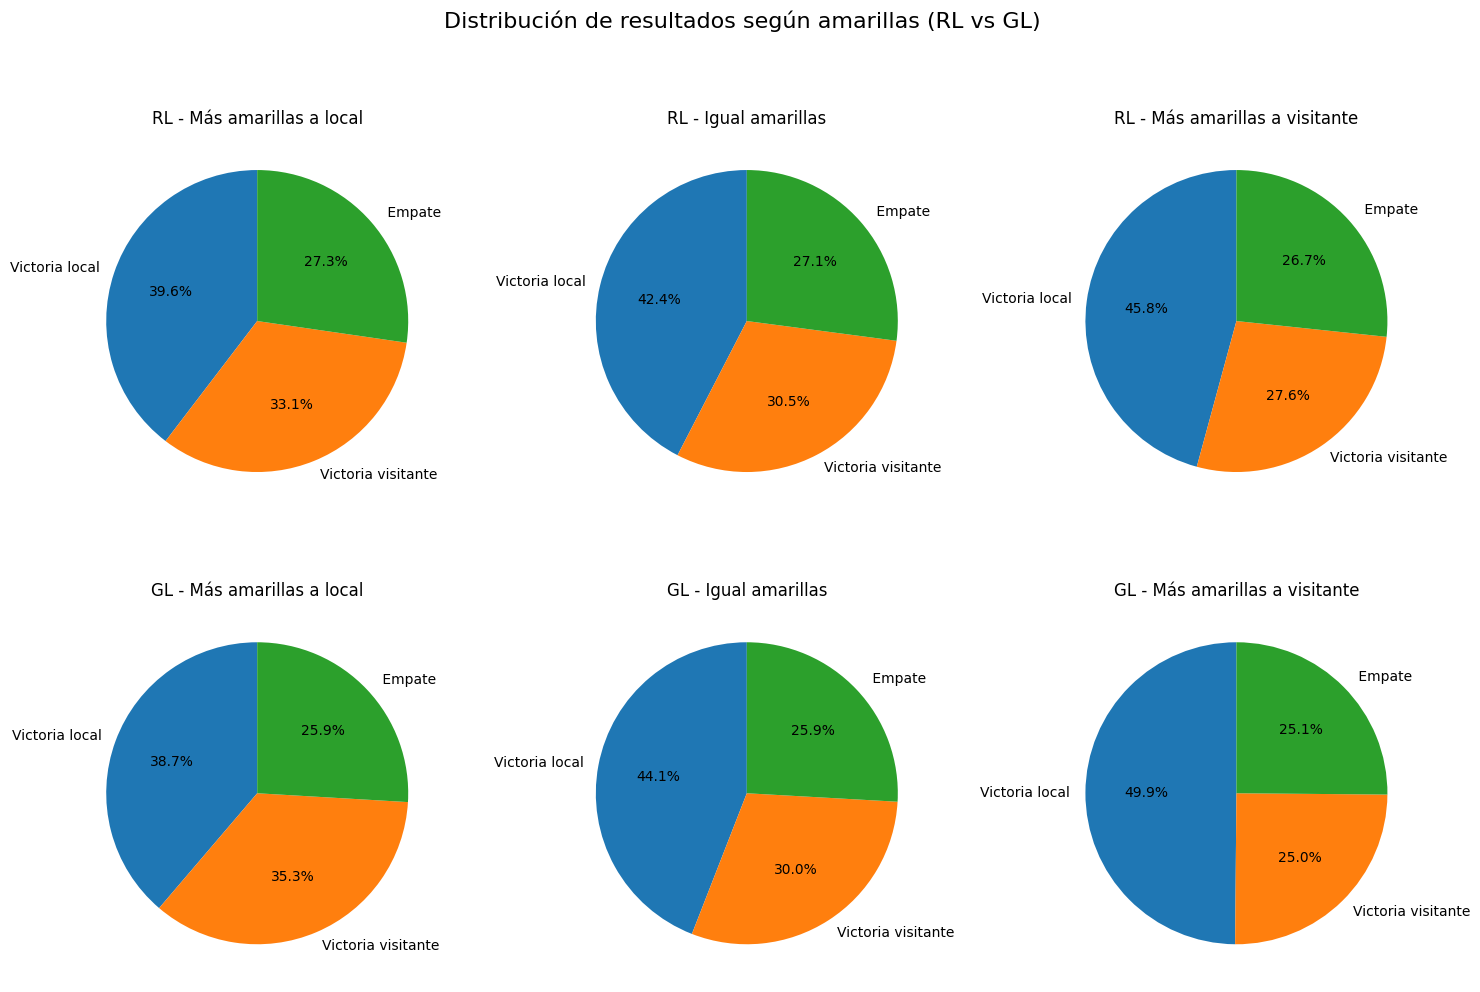

In [ ]:
# --- Datos RL ---
labels_rl = df_amarillas_final_rl.columns
amarilla_local_rl = df_amarillas_final_rl.loc["Más amarillas a local"]
amarilla_visitante_rl = df_amarillas_final_rl.loc["Más amarillas a visitante"]
amarilla_igual_rl = df_amarillas_final_rl.loc["Igual amarillas"]

total_amarilla_local_rl = sum(amarilla_local_rl)
total_amarilla_visitante_rl = sum(amarilla_visitante_rl)
total_amarilla_igual_rl = sum(amarilla_igual_rl)

porcentaje_local_rl = [x / total_amarilla_local_rl * 100 for x in amarilla_local_rl]
porcentaje_visitante_rl = [x / total_amarilla_visitante_rl * 100 for x in amarilla_visitante_rl]
porcentaje_igual_rl = [x / total_amarilla_igual_rl * 100 for x in amarilla_igual_rl]

# --- Datos GL ---
labels_gl = df_amarillas_final_gl.columns
amarilla_local_gl = df_amarillas_final_gl.loc["Más amarillas a local"]
amarilla_visitante_gl = df_amarillas_final_gl.loc["Más amarillas a visitante"]
amarilla_igual_gl = df_amarillas_final_gl.loc["Igual amarillas"]

total_amarilla_local_gl = sum(amarilla_local_gl)
total_amarilla_visitante_gl = sum(amarilla_visitante_gl)
total_amarilla_igual_gl = sum(amarilla_igual_gl)

porcentaje_local_gl = [x / total_amarilla_local_gl * 100 for x in amarilla_local_gl]
porcentaje_visitante_gl = [x / total_amarilla_visitante_gl * 100 for x in amarilla_visitante_gl]
porcentaje_igual_gl = [x / total_amarilla_igual_gl * 100 for x in amarilla_igual_gl]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Fila 1: RL
axes[0, 0].pie(porcentaje_local_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('RL - Más amarillas a local')

axes[0, 2].pie(porcentaje_visitante_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('RL - Más amarillas a visitante')

axes[0, 1].pie(porcentaje_igual_rl, labels=labels_rl, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title("RL - Igual amarillas")

# Fila 2: GL
axes[1, 0].pie(porcentaje_local_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('GL - Más amarillas a local')

axes[1, 2].pie(porcentaje_visitante_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 2].set_title('GL - Más amarillas a visitante')

axes[1, 1].pie(porcentaje_igual_gl, labels=labels_gl, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('GL - Igual amarillas')

# --- Ajustes generales ---
plt.suptitle('Distribución de resultados según amarillas (RL vs GL)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Conclusión

En los gráficos se puede observar que a pesar de tener más tarjetas amarillas, sigue teniendo más peso el ser local que el número de tarjetas amarillas mostradas. Sin embargo, sin tener más datos sobre la mesa, se puede observar que sí que afecta en cierta medida. En las grandes ligas el porcentaje de victorias locales varía alrededor de un 6% y en el resto de ligas alrededor de un 2,5%

Por lo tanto mi hipótesis es **incorrecta**